In [1]:
# predict salary based on year of experience using linear regression  
# expected relationship: salary = b * year_of_exp + e
# e = epsilon, which is a random error
# reference: https://medium.com/towards-data-science/how-to-estimate-salary-with-linear-regression-6e5511db28f6

In [2]:
# load packages
# Note that pandas and numpy are libraries
# sklearn is a library for all mainstream models

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model  

import sklearn.metrics as sm
import matplotlib.pyplot as plt

In C:\Users\myin9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\myin9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\myin9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\myin9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\myin9\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

# 1. read data from csv
### ldfasf

In [3]:
data = pd.read_csv("Salary_Data.csv")

X = data['YearsExperience']
y = data['Salary']

In [8]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
# 30 is the number of rows and 2 is the number of columns. Note that Python begins counting from zero so 0 - 29.
data.shape

(30, 2)

In [11]:
data.head(7) # Shows top 7 rows, but in the absence of the number "7," 5 is the default number of rows.

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0


In [12]:
data.tail(3) # Show the last 3 rows

,YearsExperience,Salary
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


# 2. split dataset: training and testing

In [13]:
# The training set will be used to train the model 
# The test set will be used to assess the performance of the trained model in predicting the result from unseen data.

# use scikit-learn train_test_split function to randomly split data into training and test sets.
# test size accounts for 20% of data, usually 0.2 or 0.3 is a fair amount, adjust it based on model performance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [14]:
# next step, data transformation
# scikit-learn only accepts the training and test data in a 2-dimensional array format.

In [15]:
# The reshape() function is used to give a new shape to an array without changing its data.
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [16]:
# Here, we are showing the X axis (regressor or independent variable) data we transformed in the steps above. 
# This is to ensure the above formulas worked correctly.
X_test #  30 x 0.2 = 6 rows 

array([[7.1],
       [4.5],
       [2. ],
       [4.9],
       [8.2],
       [4. ]])

In [17]:
# Here, we are showing the X axis (regressor or independent variable) data we transformed in the steps above. 
# This is to ensure the above formulas worked correctly.
y_test

array([[ 98273.],
       [ 61111.],
       [ 43525.],
       [ 67938.],
       [113812.],
       [ 55794.]])

# 3. Modeling 

In [18]:
# This creates the model object.
model = linear_model.LinearRegression()

# This fits the training set to the model. 
model.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# This formula predicts salary based on training data and the above model. 
y_train_pred = model.predict(X_train)

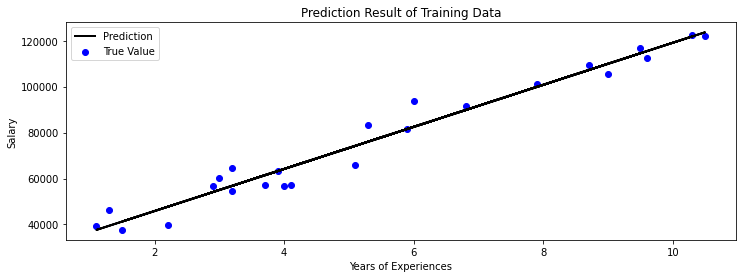

In [20]:
# Plot results: This compares the prediction to real data. 
plt.figure(figsize= (12, 4))

# This creates a scatterplot for the training data.
plt.scatter(X_train, y_train, color='blue', label="True Value")

# This creates a lineplot using predicted data for the vertical axis. 
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")

plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')

plt.legend() # show legend 
plt.show()

In [21]:
# Conclusion: The model fits well, and does not look like over or under fitting.
#  concepts
# 'overfitting': too good; reason: ; how to fix: 
# 'underfitting': too bad, reason: ; how to fix:
# Know the difference between "overfitting" and "underfitting"

In [22]:
# Predict based on test data to check if the model performed well on test data.
y_test_pred = model.predict(X_test)

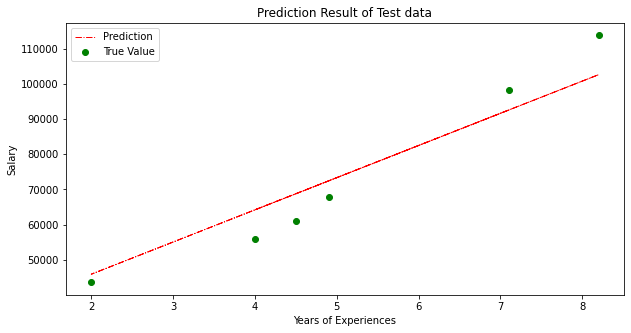

In [26]:
# Plot 
plt.figure(figsize= (10, 5))

plt.scatter(X_test, y_test, color='green', label='True Value')

# Plot the predicted test data-y
plt.plot(X_test, y_test_pred, color='red',linestyle = '-.', linewidth=1, label='Prediction')

plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()

In [27]:
# Conclusion: looks good too, but still need to evaluate the model using more standard metrics.
# Usually, models are never that clean and simple, it's not easy to just judge by 'eyeballing.'

# 4. model fit evaluation 

In [28]:
# Mean Square Error — The average of the squares of the difference between the true values and the predicted values. 
# The lower the difference, the better the performance of the model. 
# This is a common metric used for regression analysis.

print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))


Mean squared error = 52049311.76


In [29]:
# Explained Variance Score
# A measurement to examine how well a model can handle the variation of values in the dataset. 
# A score of 1.0 is a perfect score.

In [30]:

print("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 3))

sm.explained_variance_score(y_test, y_test_pred)

Explained variance score = 0.916


0.9157159275990978

In [31]:
# R2 Score 
# A measurement to examine how well our model can predict values based on the test set (unknown samples). 
# The perfect score is 1.0.

In [32]:
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

R2 score = 0.91


In [ ]:
# Conclusion: Salary grows with years of working experience and there is a linear relationship between these two variables.